In [1]:
%pip install pandas sklearn
%pip install seaborn matplotlib

In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

In [3]:
DATA_DIR = 'Data'

In [4]:
os.listdir('Data')

['baseline_submission.zip',
 'predict.py',
 'sc2021_train_deals.csv',
 '[SC2021] Baseline.ipynb']

In [5]:
df = pd.read_csv(f'{DATA_DIR}/sc2021_train_deals.csv')
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
df['month'] = pd.to_datetime(df['month'], format='%Y-%m-%d')
df

,material_code,company_code,country,region,manager_code,month,material_lvl1_name,material_lvl2_name,material_lvl3_name,contract_type,date,volume
0,134,0,Литва,Литва,12261,2018-01-01,Базовые полимеры,ПЭ,ПЭНП,Спот,2018-01-01,43.0
1,197,0,Китай,Китай,16350,2018-01-01,Базовые полимеры,ПЭ,ПЭНП,Спот,2018-01-02,95.0
2,794,2162,Казахстан,Атырауская обл.,10942,2018-01-01,Базовые полимеры,ПП,ПП,Контракт,2018-01-02,57.0
3,134,0,Литва,Литва,12261,2018-01-01,Базовые полимеры,ПЭ,ПЭНП,Спот,2018-01-02,21.0
4,133,0,Китай,Китай,17745,2018-01-01,Базовые полимеры,ПЭ,ПЭНП,Спот,2018-01-02,150.0
...,...,...,...,...,...,...,...,...,...,...,...,...
92301,134,0,Украина,Украина,18156,2020-07-01,Базовые полимеры,ПЭ,ПЭНП,Спот,2020-07-31,21.0
92302,486,0,Россия,Ростовская обл.,16156,2020-07-01,Базовые полимеры,ПП,ПП,Спот,2020-07-31,3.0
92303,276,7372,Польша,Польша,17029,2020-07-01,Базовые полимеры,ПП,ПП,Контракт,2020-07-31,25.0
92304,583,5983,Россия,Респ. Башкортостан,16788,2020-07-01,Пластики и продукты органического синтеза,ПСВ,Полистирол,Контракт,2020-07-31,21.0


In [6]:
df['material_lvl3_name'].nunique()

5

### Volume by country

In [7]:
vol_by_country = df[['country', 'volume']].groupby(by='country', as_index=False).sum()
vol_by_country = vol_by_country.sort_values(by='volume', ascending=False)
vol_by_country['vol_portion'] = vol_by_country['volume'] / vol_by_country['volume'].sum() * 100
vol_by_country.head(10)

,country,volume,vol_portion
16,Россия,1981516.0,64.098934
11,Китай,247271.0,7.998829
1,Белоруссия,180834.0,5.849696
23,Украина,128572.0,4.159103
25,Франция,126672.0,4.097641
21,Турция,77010.0,2.491153
9,Казахстан,63344.0,2.049079
15,Польша,44529.0,1.440443
12,Литва,44231.0,1.430803
4,Германия,42259.0,1.367012


### Volume by material

In [8]:
vol_by_material = df[['material_code', 'volume']].groupby(by='material_code', as_index=False).sum()
vol_by_material = vol_by_material.sort_values(by='volume', ascending=False)
vol_by_material['vol_portion'] = vol_by_material['volume'] / vol_by_material['volume'].sum() * 100
vol_by_material.head(10)

,material_code,volume,vol_portion
41,486,450998.0,14.589078
14,264,330218.0,10.682034
1,133,198324.0,6.415470
18,286,190357.0,6.157750
2,134,170549.0,5.516993
80,885,149055.0,4.821695
35,443,132000.0,4.269993
12,214,108583.0,3.512490
73,794,107657.0,3.482535
65,698,103946.0,3.362490


In [9]:
df['country'].nunique()

30

### Volume by material

In [10]:
df['material_code'].nunique()

90

### Volume by contract_type

In [11]:
vol_by_contract_type = df[['contract_type', 'volume']].groupby(by='contract_type', as_index=False).sum()
vol_by_contract_type = vol_by_contract_type.sort_values(by='volume', ascending=False)
vol_by_contract_type['vol_portion'] = vol_by_contract_type['volume'] / vol_by_contract_type['volume'].sum() * 100
vol_by_contract_type.head(10)

,contract_type,volume,vol_portion
1,Контракт,1765038.0,57.096211
2,Спот,835923.0,27.040798
0,Contract + Spot,490379.0,15.862991


In [12]:
df['contract_type'].nunique()

3

## Analysis

In [13]:
vol_by_material = df[['material_code', 'volume']].groupby(by='material_code', as_index=False).sum()
vol_by_material = vol_by_material.sort_values(by='volume', ascending=False)
vol_by_material['vol_portion'] = vol_by_material['volume'] / vol_by_material['volume'].sum() * 100
vol_by_material.head(10)

,material_code,volume,vol_portion
41,486,450998.0,14.589078
14,264,330218.0,10.682034
1,133,198324.0,6.415470
18,286,190357.0,6.157750
2,134,170549.0,5.516993
80,885,149055.0,4.821695
35,443,132000.0,4.269993
12,214,108583.0,3.512490
73,794,107657.0,3.482535
65,698,103946.0,3.362490


In [14]:
df.columns

Index(['material_code', 'company_code', 'country', 'region', 'manager_code',
       'month', 'material_lvl1_name', 'material_lvl2_name',
       'material_lvl3_name', 'contract_type', 'date', 'volume'],
      dtype='object')

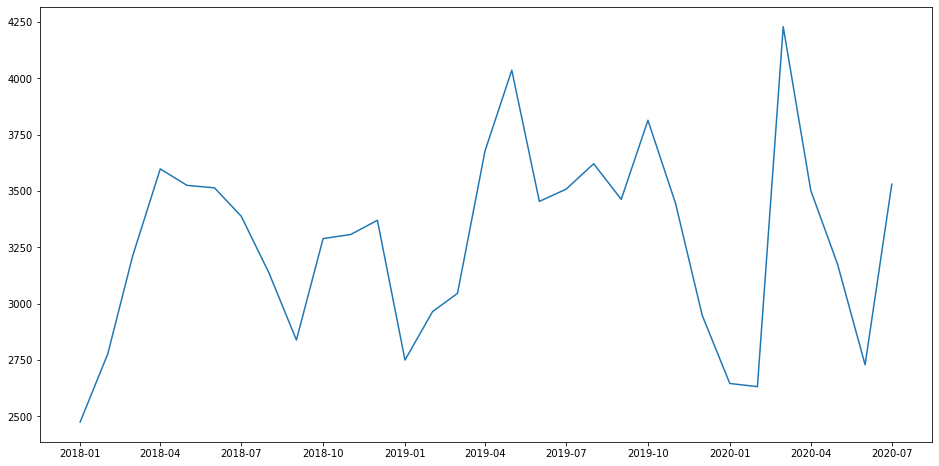

In [15]:
vol_by_month = df.groupby(by=['month', 'region'], as_index=False).sum()

plt.figure(figsize=(16, 8))
plt.plot('month', 'volume', data=vol_by_month[vol_by_month['region'] == 'г. Санкт-Петербург'])

In [16]:
region_cond = df['region'] == 'Франция'
company_cond = df['company_code'] == 0
material_cond = df['material_code'] == 486
manager_cond = df['manager_code'] == 12261

df[region_cond & material_cond & company_cond].groupby(['manager_code', 'month']).sum()
# df[manager_cond].groupby(['month']).count()

,,material_code,company_code,volume
manager_code,month,,,


In [17]:
def get_clients_managers(df):
    return df.groupby(['region', 'material_code', 'company_code'], as_index=False).agg(n_managers=pd.NamedAgg('manager_code', lambda x: x.nunique()))

In [18]:
managers = get_clients_managers(df).sort_values('n_managers')
managers[managers['n_managers'] > 1]

,region,material_code,company_code,n_managers
537,Ростовская обл.,134,0,2
746,Украина,303,0,2
748,Украина,486,0,2
631,Свердловская обл.,666,0,2
749,Украина,563,0,2
110,Италия,286,0,2
751,Украина,583,0,2
228,Молдавия,214,0,2
229,Молдавия,583,0,2
301,Московская обл.,583,0,2


In [19]:
df

,material_code,company_code,country,region,manager_code,month,material_lvl1_name,material_lvl2_name,material_lvl3_name,contract_type,date,volume
0,134,0,Литва,Литва,12261,2018-01-01,Базовые полимеры,ПЭ,ПЭНП,Спот,2018-01-01,43.0
1,197,0,Китай,Китай,16350,2018-01-01,Базовые полимеры,ПЭ,ПЭНП,Спот,2018-01-02,95.0
2,794,2162,Казахстан,Атырауская обл.,10942,2018-01-01,Базовые полимеры,ПП,ПП,Контракт,2018-01-02,57.0
3,134,0,Литва,Литва,12261,2018-01-01,Базовые полимеры,ПЭ,ПЭНП,Спот,2018-01-02,21.0
4,133,0,Китай,Китай,17745,2018-01-01,Базовые полимеры,ПЭ,ПЭНП,Спот,2018-01-02,150.0
...,...,...,...,...,...,...,...,...,...,...,...,...
92301,134,0,Украина,Украина,18156,2020-07-01,Базовые полимеры,ПЭ,ПЭНП,Спот,2020-07-31,21.0
92302,486,0,Россия,Ростовская обл.,16156,2020-07-01,Базовые полимеры,ПП,ПП,Спот,2020-07-31,3.0
92303,276,7372,Польша,Польша,17029,2020-07-01,Базовые полимеры,ПП,ПП,Контракт,2020-07-31,25.0
92304,583,5983,Россия,Респ. Башкортостан,16788,2020-07-01,Пластики и продукты органического синтеза,ПСВ,Полистирол,Контракт,2020-07-31,21.0


In [20]:
def define_growth_first_months(volume: pd.Series, n_months=6) -> float:
    """Defines absolute growth of consumption for the first months"""
    avg_year_delta = 0
    volume_values = volume.values
    for i in range(n_months):
        avg_year_delta += volume_values[i + 12] - volume_values[i]
    
    return avg_year_delta / n_months

def define_growth_last_months(volume: pd.Series, n_months=6) -> float:
    """Defines absolute growth of consumption for the latest months"""
    avg_year_delta = 0
    volume_values = volume.values
    last_month_index = len(volume_values) - 1
    for i in range(n_months):
        avg_year_delta += volume_values[last_month_index - i] - volume_values[last_month_index - i - 12]
    
    return avg_year_delta / n_months

def define_prev_month_consumption(volume: pd.Series, n_months: int, growth: float) -> pd.Series:
    """"""
    shifted_volume = volume.shift(n_months)
    values_shifted = shifted_volume.values
    for i in range(n_months):
        values_shifted[i] = max(0, values_shifted[i + 12] - growth)
    
    return shifted_volume

def define_prev_month_non_zero_consumption(volume: pd.Series, n_months: int, growth: float) -> pd.Series:
    """"""
    shifted_volume = volume.shift(n_months)
    values_shifted = shifted_volume.values
    for i in range(n_months):
        values_shifted[i] = max(0, values_shifted[i + 12] - growth)
        
    for i in range(len(values_shifted) - 1, -1, -1):
        if values_shifted[i] != 0:
            continue
        
        for j in range(i, -1, -1):
            if values_shifted[j] != 0:
                values_shifted[i] = values_shifted[j]
                break
    
    return shifted_volume

def define_last_months_average(volume: pd.Series, n_months: int, growth: float) -> pd.Series:
    """"""
    volume_values = volume.values
    avg_values = np.zeros_like(volume_values, dtype=float)
    first_n_proj = volume_values[(12-n_months): 12] - growth
    volume_values = np.hstack((first_n_proj, volume_values))
    last_month_index = len(volume_values) - 1
    
    for i in range(last_month_index, n_months - 1, -1):
        avg_values[i - n_months] = np.mean(volume_values[(i - n_months):(i)])
    
    return pd.Series(avg_values)

def define_covid_month_flag(month_series: pd.Series, month_num: int):
    """"""
    flag_values = np.zeros_like(month_series, dtype=int)
    flag_values[(month_series.dt.month == month_num) & (month_series.dt.year == 2020)] = 1
    
    return pd.Series(flag_values)

def define_january_month_flag(month_series: pd.Series):
    """Captures periodicity"""
    flag_values = np.zeros_like(month_series, dtype=int)
    flag_values[(month_series.dt.month == 1)] = 1
    
    return pd.Series(flag_values)

def define_zero_consumption_n_months(volume: pd.Series, n_months: int):
    volume_values = volume.values
    zero_cons_months = np.zeros_like(volume_values)
    for i in range(len(volume_values) - 1, n_months-1, -1):
        zero_cons_months[i] = (volume_values[(i - n_months):i] == 0).sum()
    
    for i in range(n_months-1, -1, -1):
        zero_cons_months[i] = zero_cons_months[i + 1]
    
    return zero_cons_months
    

## -------------------------------------- Model on material-region-company --------------------------------------

### Feature engeneering on material-region-company data
Creating features

In [21]:
# Aggregation
vol_by_material_region_com = df[['material_code', 'region', 'company_code', 'month', 'volume']].groupby(['material_code', 'region', 'company_code', 'month'], as_index=False)
vol_by_material_region_com = vol_by_material_region_com.aggregate({'volume': ['sum', 'mean', 'count']})
vol_by_material_region_com.columns = vol_by_material_region_com.columns.map(''.join)
vol_by_material_region_com = vol_by_material_region_com.rename(
    columns={'volumesum': 'volume', 'volumemean': 'deal_mean', 'volumecount': 'deal_count'}
)
vol_by_material_region_com

,material_code,region,company_code,month,volume,deal_mean,deal_count
0,124,Респ. Татарстан,7278,2018-01-01,340.0,48.571429,7
1,124,Респ. Татарстан,7278,2018-02-01,340.0,48.571429,7
2,124,Респ. Татарстан,7278,2018-03-01,260.0,37.142857,7
3,124,Респ. Татарстан,7278,2018-04-01,240.0,40.000000,6
4,124,Респ. Татарстан,7278,2018-05-01,220.0,55.000000,4
...,...,...,...,...,...,...,...
17709,998,г. Санкт-Петербург,5410,2020-02-01,180.0,20.000000,9
17710,998,г. Санкт-Петербург,5410,2020-03-01,180.0,22.500000,8
17711,998,г. Санкт-Петербург,5410,2020-04-01,100.0,20.000000,5
17712,998,г. Санкт-Петербург,5410,2020-05-01,140.0,20.000000,7


#### Creating DataFrame for each material-region-company combination

In [22]:
def produce_features(df: pd.DataFrame) -> dict:
    """
    Produces features
    """
    # Aggregation
    vol_by_material_region_com = df[['material_code', 'region', 'company_code', 'month', 'volume']].groupby(
        ['material_code', 'region', 'company_code', 'month'],
        as_index=False,
    ).sum()
    
    months = pd.date_range(vol_by_material_region_com['month'].min(), vol_by_material_region_com['month'].max() + pd.DateOffset(months=1), freq='MS')
    months_df = pd.DataFrame({'month': months}).sort_values('month')
    
    unique_combinations = vol_by_material_region_com.drop(columns=['month', 'volume']).drop_duplicates().reset_index(drop=True)

    item_dfs = {}
    for record in unique_combinations.to_records(index=False):
        tpl = tuple(record)
        material = tpl[0]
        region = tpl[1]
        company = tpl[2]

        material_cond = vol_by_material_region_com['material_code'] == material
        company_cond = vol_by_material_region_com['company_code'] == company
        region_cond = vol_by_material_region_com['region'] == region

        item_df = vol_by_material_region_com[region_cond & material_cond & company_cond]

        if item_df.empty:
            continue

        item_df = item_df.merge(months_df, on='month', how='outer').sort_values('month').fillna(0)
        item_df['region'] = region
        item_df['material_code'] = material
        item_df['company_code'] = company

        growth_first = define_growth_first_months(item_df['volume'])

        # Prev month consumption
        for i in [1, 2, 3, 12]:
            item_df[f'volume_prev_{i}'] = define_prev_month_consumption(item_df['volume'], i, growth_first)

        # Prev month average
        item_df['volume_avg_last_3'] = define_last_months_average(item_df['volume'], 3, growth_first)
        item_df['volume_avg_last_6'] = define_last_months_average(item_df['volume'], 6, growth_first)
        item_df['volume_avg_last_12'] = define_last_months_average(item_df['volume'], 12, growth_first)
        
        # Number of months with zero consumption for last n months
        item_df['zero_consumption_last_3'] = define_zero_consumption_n_months(item_df['volume'], 3)
        item_df['zero_consumption_last_6'] = define_zero_consumption_n_months(item_df['volume'], 6)
        
        # latest non zero consumption
        item_df['volume_prev_non_zero_1'] = define_prev_month_non_zero_consumption(item_df['volume'], 1, growth_first)

        # Covid flag
        item_df['covid_flag_month_3'] = define_covid_month_flag(item_df['month'], 3)
        item_df['covid_flag_month_4'] = define_covid_month_flag(item_df['month'], 4)
        item_df['covid_flag_month_5'] = define_covid_month_flag(item_df['month'], 5)

        # January flag
        item_df['jan_flag'] = define_january_month_flag(item_df['month'])

        # Add average growth for the last year


        item_dfs[tpl] = item_df
    
    return item_dfs

In [23]:
item_dfs = produce_features(df)

In [24]:
item_dfs[(133, 'Московская обл.', 7046)]

,material_code,region,company_code,month,volume,volume_prev_1,volume_prev_2,volume_prev_3,volume_prev_12,volume_avg_last_3,volume_avg_last_6,volume_avg_last_12,zero_consumption_last_3,zero_consumption_last_6,volume_prev_non_zero_1,covid_flag_month_3,covid_flag_month_4,covid_flag_month_5,jan_flag
0,133,Московская обл.,7046,2018-01-01,140.0,175.833333,175.833333,175.833333,175.833333,175.833333,180.833333,185.000000,0.0,0.0,175.833333,0,0,0,1
1,133,Московская обл.,7046,2018-02-01,160.0,140.000000,175.833333,175.833333,195.833333,163.888889,171.527778,182.013889,0.0,0.0,140.000000,0,0,0,0
2,133,Московская обл.,7046,2018-03-01,160.0,160.000000,140.000000,175.833333,195.833333,158.611111,170.555556,179.027778,0.0,0.0,160.000000,0,0,0,0
3,133,Московская обл.,7046,2018-04-01,160.0,160.000000,160.000000,140.000000,195.833333,153.333333,164.583333,176.041667,0.0,0.0,160.000000,0,0,0,0
4,133,Московская обл.,7046,2018-05-01,140.0,160.000000,160.000000,160.000000,175.833333,160.000000,161.944444,173.055556,0.0,0.0,160.000000,0,0,0,0
5,133,Московская обл.,7046,2018-06-01,160.0,140.000000,160.000000,160.000000,195.833333,153.333333,155.972222,170.069444,0.0,0.0,140.000000,0,0,0,0
6,133,Московская обл.,7046,2018-07-01,160.0,160.000000,140.000000,160.000000,195.833333,153.333333,153.333333,167.083333,0.0,0.0,160.000000,0,0,0,0
7,133,Московская обл.,7046,2018-08-01,130.0,160.000000,160.000000,140.000000,165.833333,153.333333,156.666667,164.097222,0.0,0.0,160.000000,0,0,0,0
8,133,Московская обл.,7046,2018-09-01,160.0,130.000000,160.000000,160.000000,195.833333,150.000000,151.666667,161.111111,0.0,0.0,130.000000,0,0,0,0
9,133,Московская обл.,7046,2018-10-01,140.0,160.000000,130.000000,160.000000,175.833333,150.000000,151.666667,158.125000,0.0,0.0,160.000000,0,0,0,0


###  Building model

In [25]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error

In [26]:
def define_managers_portions(df) -> pd.DataFrame:
    """Вычисляет пропорции объемов продаж для комбинации компания-материал по менеджерам
    """
    res = {}
    vol_breakdown = df[['material_code', 'region', 'country', 'month', 'company_code', 'manager_code', 'volume']].groupby(
        ['material_code', 'region', 'country', 'month', 'company_code', 'manager_code'],
        as_index=False,
    ).sum()
    unique_combinations = vol_breakdown.drop(columns=['month', 'volume']).drop_duplicates().reset_index(drop=True)
    
    for tpl in unique_combinations.itertuples(index=False):
        material_cond = vol_breakdown['material_code'] == tpl.material_code
        region_cond = vol_breakdown['region'] == tpl.region
        company_cond = vol_breakdown['company_code'] == tpl.company_code
        tpl_df = vol_breakdown[material_cond & region_cond & company_cond].sort_values('month')
        
        # Only one manager for the year
        if tpl_df[tpl_df['month'].dt.year == 2020]['manager_code'].nunique() == 1:
            res[tpl] = [*tpl, 1]
            continue
        
        # Only one manager for the year
        if tpl_df[tpl_df['month'].dt.year == 2020].empty:
            if tpl_df['manager_code'].values[-1] == tpl.manager_code:
                res[tpl] = [*tpl, 1]
            else:
                res[tpl] = [*tpl, 0]
            continue

        tpl_df_by_managers = tpl_df[tpl_df['month'].dt.year == 2020].groupby(['manager_code']).sum()
        tpl_df_by_managers['volume'] = tpl_df_by_managers['volume'] / tpl_df_by_managers['volume'].sum()
        res[tpl] = [*tpl, tpl_df_by_managers['volume'][tpl.manager_code]]
        
    return pd.DataFrame.from_dict(
        res, 
        orient='index', 
        columns=['material_code', 'region', 'country', 'company_code', 'manager_code', 'portion']
    ).reset_index(drop=True)
    


In [27]:
def get_train_test_dfs(input_df: pd.DataFrame, last_train_month, test_month):
    train = input_df[input_df['month'] <= last_train_month]
    y_train = train['volume'].values
    X_train = train.drop(columns=['volume', 'material_code', 'company_code', 'region', 'month'])

    test = input_df[input_df['month'] == test_month]
    y_test = test['volume'].values
    X_test = test.drop(columns=['volume', 'material_code', 'company_code', 'region', 'month'])
    
    return X_train, y_train, X_test, y_test

In [28]:
# TODO: Попробовать: 
# - потюнить гиперпараметры
# - тренировать модели с учетом начальных и конечных дат
# - объединять наблюдения - определять похожесть паттернов потреблений между компаниями, товарами.
def train_models(item_dfs: dict, last_train_month, test_month, corr_threshold, seed=0) -> dict:
    models = {}
    volume_dfs = {}
    clusters = {}
    
    for key_tpl, item_df in item_dfs.items():
        volume_dfs[key_tpl] = item_df[item_df['month'] <= last_train_month]['volume'].values

    all_volumes = pd.DataFrame.from_dict(volume_dfs, orient='columns')
    all_volumes_corr = all_volumes.corr()
    
    for key_tpl, item_df in item_dfs.items():
        X_train, y_train, X_test, y_test = get_train_test_dfs(item_dfs[key_tpl], last_train_month, test_month)
        
        X_train_combined = X_train
        y_train_combined = y_train
        
        corr_cluster_df = all_volumes_corr[(all_volumes_corr[key_tpl] >= corr_threshold) & (all_volumes_corr[key_tpl] < 1)]
        for corr_key_tpl in corr_cluster_df.index:
            if not check_for_similarity(volume_dfs[key_tpl], volume_dfs[corr_key_tpl]):
                continue
                
            scaling_f = calculate_scaling_factor(volume_dfs[key_tpl], volume_dfs[corr_key_tpl])
            if pd.isna(scaling_f):
                continue
            
            X_train, y_train, X_test, y_test = get_train_test_dfs(item_dfs[corr_key_tpl], last_train_month, test_month)
            
            X_train = apply_scaling_factor(X_train, scaling_f)
            y_train = y_train * scaling_f
            
            X_train_combined = X_train_combined.append(X_train)
            y_train_combined = np.hstack((y_train_combined, y_train))
            
        model = RandomForestRegressor(random_state=seed).fit(X_train, y_train)
#         model = GradientBoostingRegressor(random_state=seed).fit(X_train, y_train)
#         model = SVR().fit(X_train, y_train)
        models[key_tpl] = model
        clusters[key_tpl] = [key_tpl, *list(corr_cluster_df.index)]
        
        print(key_tpl, '\t', len(y_train_combined))
        
    return models, clusters

def check_for_similarity(orig, other):
    return True

def calculate_scaling_factor(orig, other):
    if np.allclose(orig, other):
        return 1
    
    n_months_for_sf = 12
    array_size = len(orig)
    n_nonzeros_threshold = 5
    for i in range(12):
        if (orig[(array_size - i - n_months_for_sf):(array_size - i)] > 0).sum() > n_nonzeros_threshold and\
            (other[(array_size - i - n_months_for_sf):(array_size - i)] > 0).sum() > n_nonzeros_threshold:
                return orig[(array_size - i - n_months_for_sf):(array_size - i)].sum() / other[(array_size - i - n_months_for_sf):(array_size - i)].sum()
    
    return np.nan

def apply_scaling_factor(data: pd.DataFrame, sf):
    for col in data.columns:
        if 'flag' in col:
            continue
        data[col] = data[col] * sf
    
    return data

In [29]:
def build_month_predictions(models, item_dfs: pd.DataFrame, last_train_month, test_month) -> dict:
    all_actual = np.array([])
    all_pred = np.array([])
    
    for key_tpl, item_df in item_dfs.items(): 
        X_train, y_train, X_test, y_test = get_train_test_dfs(item_df, last_train_month, test_month)
        
        model = models[key_tpl]
        y_pred = np.abs(model.predict(X_test))

        all_actual = np.hstack((all_actual, y_test))
        all_pred = np.hstack((all_pred, y_pred))
        
    res_df = pd.DataFrame({'actual': all_actual, 'pred': all_pred}, index=list(models.keys()))
    res_df = res_df.reset_index()
    res_df = res_df.join(pd.DataFrame.from_records(res_df['index']))
    res_df = res_df.rename(columns={0: 'material_code', 1: 'region', 2: 'company_code'})
    
    return res_df.drop(columns=['index'])
        

def produce_final_result(result_df, input_df, test_month):
    portions = define_managers_portions(input_df)
    
    merged_res_df = result_df.merge(portions, on=['material_code', 'region', 'company_code'], how='outer')
    merged_res_df['final_pred'] = merged_res_df['pred'] * merged_res_df['portion']
    
    vol_breakdown = input_df[['material_code', 'region', 'month', 'company_code', 'manager_code', 'volume']].groupby(
        ['material_code', 'region', 'month', 'company_code', 'manager_code'],
        as_index=False,
    ).sum()
    month_vol_breakdown = vol_breakdown[vol_breakdown['month'] == test_month]
    
    merged_res_df = merged_res_df.merge(month_vol_breakdown, on=['material_code', 'region', 'company_code', 'manager_code'], how='outer')
    merged_res_df = merged_res_df.fillna(0)
    
    return merged_res_df


def merge_with_actual(result_df, input_df, test_month, distributed_result_flag: bool):
    if distributed_result_flag:
        group_cols = ['material_code', 'region', 'country', 'month', 'company_code', 'manager_code']
    else:
        group_cols = ['material_code', 'region', 'month', 'company_code']
    
    vol_breakdown = input_df[[*group_cols, 'volume']].groupby(
        group_cols,
        as_index=False,
    ).sum()
    month_vol_breakdown = vol_breakdown[vol_breakdown['month'] == test_month]
    
    merge_cols = [col for col in group_cols if col != 'month']
    merged_res_df = result_df.merge(month_vol_breakdown, on=merge_cols, how='outer')
    merged_res_df = merged_res_df.fillna(0)
    
    return merged_res_df


def create_modename_mapping(item_dfs: dict):
    res_dict = {}
    for value, key in enumerate(item_dfs.keys()):
        res_dict[key] = value + 1
    
    res_df = pd.DataFrame.from_dict(res_dict, orient='index', columns=['value'])
    res_df = res_df.reset_index()
    res_df = res_df.join(pd.DataFrame.from_records(res_df['index']))
    res_df = res_df.rename(columns={0: 'material_code', 1: 'region', 2: 'company_code'})
        
    return res_df

In [30]:
def predict(df: pd.DataFrame, month: pd.Timestamp) -> pd.DataFrame:
    """
    Вычисление предсказаний.

    Параметры:
        df:
          датафрейм, содержащий все сделки с начала тренировочного периода до month, не включая month
        month:
          месяц, для которого вычисляются предсказания.

    Результат:
        Датафрейм предсказаний для каждой группы, содержащий колонки:
            - `material_code`, `company_code`, `country`, `region`, `manager_code`,
            - `prediction`.
        Предсказанные значения находятся в колонке `prediction`.
    """
    res_df = predict_company_region_level(df, month)
    portions = get_manager_portions()
    
    merged_res_df = res_df.merge(portions, on=['material_code', 'region', 'company_code'], how='outer')
    merged_res_df['prediction'] = merged_res_df['company_region_pred'] * merged_res_df['portion']
    
    return merged_res_df[['material_code', 'company_code', 'country', 'region', 'manager_code', 'prediction']]


def predict_company_region_level(df: pd.DataFrame, month: pd.Timestamp) -> pd.DataFrame:
    item_dfs = produce_features(df)
    modelname_mapping = get_modelname_mapping()
    companies_dates = get_dates(item_dfs, 'company_code', True)
    materials_dates = get_dates(item_dfs, 'material_code', True)
    all_pred = np.array([])
    
    for key_tpl, item_df in item_dfs.items():
        model = get_model(key_tpl, modelname_mapping)
        X_test = item_df[item_df['month'] == month].drop(columns=['volume', 'material_code', 'company_code', 'region', 'month'])
        
        y_pred = max(model.predict(X_test), 0)
        if not materials_dates[materials_dates['material_code'] == key_tpl[0]]['end_month'].isna().values[0]:
            y_pred[0] = 0
        if not companies_dates[companies_dates['company_code'] == key_tpl[2]]['end_month'].isna().values[0]:
            y_pred[0] = 0
        
        all_pred = np.hstack((all_pred, y_pred))
        
    res_df = pd.DataFrame({'company_region_pred': all_pred}, index=list(item_dfs.keys()))
    res_df = res_df.reset_index()
    res_df = res_df.join(pd.DataFrame.from_records(res_df['index']))
    res_df = res_df.rename(columns={0: 'material_code', 1: 'region', 2: 'company_code'})
    
    return res_df


def get_model(model_key: tuple, mapping: dict):
    mapped_name = mapping['value'][model_key]
    return joblib.load(f'models/{mapped_name}.joblib')

def get_manager_portions():
    return pd.read_csv('portions.csv')

def get_modelname_mapping():
    df = pd.read_csv('modelname_mapping.csv', index_col=0)
    df.index = zip(df['material_code'], df['region'], df['company_code'])
    
    return df
    

In [31]:
def get_all_volumes_df(item_dfs, last_month_is_fake: bool):
    volume_dfs = {}
    months = []
    for key_tpl, item_df in item_dfs.items():
        if len(volume_dfs) == 0:
            months = item_df['month']
        volume_dfs[key_tpl] = item_df['volume'].values

    all_volumes = pd.DataFrame.from_dict(volume_dfs, orient='columns')
    all_volumes.index = months
    all_volumes.columns.names = ['material_code', 'region', 'company_code']
    
    if last_month_is_fake:
        return all_volumes.iloc[:-1, :]
    
    return all_volumes

In [32]:
def get_dates(item_dfs, feature: str, last_month_is_fake: bool):
    """Определяет начальную и конечную даты (если такие есть) продажи товара или деятельности компаний"""
    all_volumes = get_all_volumes_df(item_dfs, last_month_is_fake)
    all_materials = all_volumes.columns.get_level_values(feature).unique()
    res = []
    
    for material in all_materials:
        material_df = all_volumes.loc[:, all_volumes.columns.get_level_values(feature) == material]
        n_rows = 1
        if len(material_df.columns) == 1:
            n_rows = 3
        elif len(material_df.columns) >=2 and len(material_df.columns) <= 4:
            n_rows = 2
        
        # define start_date
        date_start = -1
        if material_df.values[:(n_rows), :].sum().sum() == 0:
            date_start = n_rows - 1
            
            for i in range(0, material_df.shape[0] - 1):
                if material_df.values[i:(i+n_rows), :].sum().sum() == 0 and material_df.values[(i+1):(i+1+n_rows), :].sum().sum() != 0:
                    date_start = i + n_rows
                    break
        
        # define date_end
        date_end = -1
        if material_df.values[(-1-n_rows):(-1), :].sum().sum() == 0:
            date_end = material_df.shape[0] - n_rows
            
            for i in range(material_df.shape[0] - 1, 1, -1):
                if material_df.values[(i-n_rows):i].sum().sum() == 0 and material_df.values[(i-1-n_rows):(i-1)].sum().sum() != 0:
                    date_end = i - n_rows - 1
                    break
        
        month_start = material_df.index[date_start] if date_start > 0 else None
        month_end = material_df.index[date_end] if date_end > 0 else None
        
        res.append((material, month_start, month_end))
    
    return pd.DataFrame.from_records(res, columns=[feature, 'start_month', 'end_month'])
    

In [33]:
all_volumes = get_all_volumes_df(item_dfs, True)
all_materials = all_volumes.columns.get_level_values('material_code').unique()

In [34]:
all_volumes.loc[:, all_volumes.columns.get_level_values('material_code') == 850]

material_code             850              
region        Респ. Татарстан Тверская обл.
company_code             3271          2701
month                                      
2018-01-01                0.0           0.0
2018-02-01                0.0           0.0
2018-03-01                0.0           0.0
2018-04-01                0.0           0.0
2018-05-01                0.0           0.0
2018-06-01                0.0           0.0
2018-07-01                0.0           0.0
2018-08-01                0.0           0.0
2018-09-01                0.0           0.0
2018-10-01              720.0        1160.0
2018-11-01             1000.0        1520.0
2018-12-01              600.0        1120.0
2019-01-01              120.0         400.0
2019-02-01              247.0         206.0
2019-03-01              124.0         615.0
2019-04-01                0.0           0.0
2019-05-01                0.0           0.0
2019-06-01                0.0           0.0
2019-07-01                0.0          21.0
2019-08-01              621.0         600.0
2019-09-01              599.0        1138.0
2019-10-01              619.0         868.0
2019-11-01              206.0         269.0
2019-12-01              515.0         268.0
2020-01-01              413.0         186.0
2020-02-01              619.0         103.0
2020-03-01              309.0           0.0
2020-04-01               62.0           0.0
2020-05-01                0.0           0.0
2020-06-01                0.0           0.0
2020-07-01                0.0           0.0

In [35]:
com_dates = get_dates(item_dfs, 'company_code', True).sort_values('end_month')
com_dates

,company_code,start_month,end_month
168,6650,2018-05-01,2018-10-01
120,4306,NaT,2019-01-01
212,6910,NaT,2019-04-01
70,1152,2018-04-01,2019-05-01
68,7566,2018-09-01,2019-05-01
...,...,...,...
223,7543,NaT,NaT
225,8077,NaT,NaT
226,1569,2018-09-01,NaT
227,9943,2020-02-01,NaT


In [36]:
not com_dates[com_dates['company_code'] == 4306]['start_month'].isna().values[0]

False

### Main computing

In [37]:
train_m = pd.to_datetime('2020-06-01')
test_m = pd.to_datetime('2020-07-01')
trained_models, clusters = train_models(item_dfs, train_m, test_m, 1)

(124, 'Респ. Татарстан', 7278) 	 30
(133, 'Алтайский край', 0) 	 30
(133, 'Белгородская обл.', 9644) 	 30
(133, 'Воронежская обл.', 9912) 	 30
(133, 'Иркутская обл.', 0) 	 30
(133, 'Иркутская обл.', 6019) 	 30
(133, 'Калужская обл.', 0) 	 30
(133, 'Калужская обл.', 7555) 	 30
(133, 'Калужская обл.', 9191) 	 30
(133, 'Кемеровская обл.', 0) 	 30
(133, 'Киргизия', 0) 	 30
(133, 'Китай', 0) 	 30
(133, 'Китай', 3560) 	 30
(133, 'Краснодарский край', 6385) 	 30
(133, 'Краснодарский край', 9621) 	 30
(133, 'Курская обл.', 3102) 	 30
(133, 'Ленинградская обл.', 3247) 	 30
(133, 'Ленинградская обл.', 6385) 	 30
(133, 'Минская обл.', 0) 	 30
(133, 'Могилевская обл.', 0) 	 30
(133, 'Московская обл.', 0) 	 30
(133, 'Московская обл.', 1619) 	 30
(133, 'Московская обл.', 2040) 	 30
(133, 'Московская обл.', 2962) 	 30
(133, 'Московская обл.', 3342) 	 30
(133, 'Московская обл.', 7046) 	 30
(133, 'Московская обл.', 7423) 	 30
(133, 'Московская обл.', 8656) 	 30
(133, 'Московская обл.', 9644) 	 30
(133,

(214, 'Орловская обл.', 0) 	 30
(214, 'Павлодарская обл.', 0) 	 30
(214, 'Пермский край', 0) 	 30
(214, 'Польша', 0) 	 30
(214, 'Псковская обл.', 0) 	 30
(214, 'Респ. Башкортостан', 0) 	 30
(214, 'Респ. Башкортостан', 5983) 	 30
(214, 'Респ. Мордовия', 4839) 	 30
(214, 'Респ. Саха (Якутия)', 0) 	 30
(214, 'Респ. Татарстан', 0) 	 30
(214, 'Ростовская обл.', 0) 	 30
(214, 'Рязанская обл.', 0) 	 30
(214, 'Самарская обл.', 0) 	 30
(214, 'Самарская обл.', 6795) 	 30
(214, 'Саратовская обл.', 0) 	 30
(214, 'Свердловская обл.', 0) 	 30
(214, 'Свердловская обл.', 9370) 	 30
(214, 'Сербия', 0) 	 30
(214, 'Словакия', 0) 	 30
(214, 'Смоленская обл.', 0) 	 30
(214, 'Ставропольский край', 0) 	 30
(214, 'Ставропольский край', 6998) 	 30
(214, 'Тульская обл.', 0) 	 30
(214, 'Тульская обл.', 2054) 	 30
(214, 'Тюменская обл.', 0) 	 30
(214, 'Украина', 0) 	 30
(214, 'Челябинская обл.', 8384) 	 30
(214, 'Чувашская респ.', 0) 	 30
(214, 'Ярославская обл.', 0) 	 30
(214, 'г. Алма-Ата', 0) 	 30
(214, 'г. Ми

(486, 'Владимирская обл.', 6081) 	 30
(486, 'Владимирская обл.', 8656) 	 30
(486, 'Волгоградская обл.', 4583) 	 30
(486, 'Воронежская обл.', 7019) 	 30
(486, 'Казахстан', 3237) 	 30
(486, 'Калужская обл.', 0) 	 30
(486, 'Кемеровская обл.', 9867) 	 30
(486, 'Киргизия', 0) 	 30
(486, 'Кировская обл.', 9323) 	 30
(486, 'Красноярский край', 0) 	 30
(486, 'Красноярский край', 5980) 	 30
(486, 'Красноярский край', 9500) 	 30
(486, 'Красноярский край', 9867) 	 30
(486, 'Московская обл.', 0) 	 30
(486, 'Московская обл.', 1243) 	 30
(486, 'Московская обл.', 1257) 	 30
(486, 'Московская обл.', 2674) 	 30
(486, 'Московская обл.', 5713) 	 30
(486, 'Московская обл.', 5735) 	 30
(486, 'Московская обл.', 5965) 	 30
(486, 'Московская обл.', 7824) 	 30
(486, 'Московская обл.', 8656) 	 30
(486, 'Московская обл.', 9644) 	 30
(486, 'Нидерланды', 5595) 	 30
(486, 'Нижегородская обл.', 9644) 	 30
(486, 'Новосибирская обл.', 8656) 	 30
(486, 'Новосибирская обл.', 9644) 	 30
(486, 'Омская обл.', 1559) 	 30
(4

(666, 'Ханты-Мансийский а. о.', 0) 	 30
(666, 'Челябинская обл.', 0) 	 30
(666, 'г. Минск', 0) 	 30
(666, 'г. Москва', 0) 	 30
(673, 'Витебская обл.', 1650) 	 30
(673, 'Германия', 0) 	 30
(673, 'Мангистауская обл.', 0) 	 30
(673, 'Молдавия', 0) 	 30
(673, 'Московская обл.', 1147) 	 30
(673, 'Московская обл.', 2040) 	 30
(673, 'Московская обл.', 3660) 	 30
(673, 'Респ. Коми', 5874) 	 30
(673, 'Респ. Татарстан', 6080) 	 30
(673, 'Респ. Татарстан', 9499) 	 30
(673, 'Самарская обл.', 8656) 	 30
(673, 'Свердловская обл.', 8611) 	 30
(673, 'Таджикистан', 0) 	 30
(673, 'Тульская обл.', 2393) 	 30
(673, 'Турция', 0) 	 30
(686, 'Австрия', 1378) 	 30
(698, 'Воронежская обл.', 0) 	 30
(698, 'Ивановская обл.', 8656) 	 30
(698, 'Московская обл.', 1314) 	 30
(698, 'Московская обл.', 5713) 	 30
(698, 'Московская обл.', 8267) 	 30
(698, 'Респ. Башкортостан', 6415) 	 30
(698, 'Респ. Татарстан', 2393) 	 30
(698, 'Респ. Татарстан', 3271) 	 30
(698, 'Ростовская обл.', 4436) 	 30
(698, 'Смоленская обл.', 3

In [38]:
create_modename_mapping(item_dfs).to_csv('modelname_mapping.csv', index=False)
mapping = get_modelname_mapping()

In [39]:
os.makedirs('models', exist_ok=True)
for key_tpl, model in trained_models.items():
    mapped_name = mapping['value'][key_tpl]
    joblib.dump(model, f'models/{mapped_name}.joblib')

In [40]:
portions = define_managers_portions(df)
portions.to_csv('portions.csv', index=False)

### Predict

In [41]:
predict_month = pd.Timestamp(year=2020, month=7, day=1)

In [42]:
predict(df, predict_month)

,material_code,company_code,country,region,manager_code,prediction
0,124,7278,Россия,Респ. Татарстан,17460,0.00
1,133,0,Россия,Алтайский край,17506,38.85
2,133,9644,Россия,Белгородская обл.,12444,4.60
3,133,9912,Россия,Воронежская обл.,13632,97.41
4,133,0,Россия,Иркутская обл.,10642,6.28
...,...,...,...,...,...,...
936,986,9362,Россия,г. Санкт-Петербург,14956,110.86
937,998,0,Россия,Ленинградская обл.,18079,0.24
938,998,3380,Россия,Ленинградская обл.,14956,34.67
939,998,6346,Россия,Респ. Башкортостан,10737,4.12


In [43]:
# reg_comp_preds_prev = reg_comp_preds

In [44]:
reg_comp_preds = predict_company_region_level(df, predict_month)
reg_comp_preds = merge_with_actual(reg_comp_preds, df, predict_month, False)

In [45]:
reg_comp_preds['log_error'] = np.log(reg_comp_preds['company_region_pred'] + 1) - np.log(reg_comp_preds['volume'] + 1)
reg_comp_preds

,index,company_region_pred,material_code,region,company_code,month,volume,log_error
0,"(124, Респ. Татарстан, 7278)",0.00,124,Респ. Татарстан,7278,0,0.0,0.000000
1,"(133, Алтайский край, 0)",38.85,133,Алтайский край,0,2020-07-01 00:00:00,63.0,-0.473761
2,"(133, Белгородская обл., 9644)",4.60,133,Белгородская обл.,9644,2020-07-01 00:00:00,83.0,-2.708050
3,"(133, Воронежская обл., 9912)",97.41,133,Воронежская обл.,9912,2020-07-01 00:00:00,84.0,0.146491
4,"(133, Иркутская обл., 0)",6.28,133,Иркутская обл.,0,2020-07-01 00:00:00,72.0,-2.305329
...,...,...,...,...,...,...,...,...
882,"(986, г. Санкт-Петербург, 9362)",110.86,986,г. Санкт-Петербург,9362,2020-07-01 00:00:00,112.0,-0.010140
883,"(998, Ленинградская обл., 0)",0.24,998,Ленинградская обл.,0,2020-07-01 00:00:00,9.0,-2.087474
884,"(998, Ленинградская обл., 3380)",34.67,998,Ленинградская обл.,3380,2020-07-01 00:00:00,50.0,-0.357516
885,"(998, Респ. Башкортостан, 6346)",4.12,998,Респ. Башкортостан,6346,2020-07-01 00:00:00,21.0,-1.457888


#### Score

In [48]:
np.sqrt(mean_squared_log_error(reg_comp_preds['volume'], reg_comp_preds['company_region_pred']))

1.6403951453452301

In [47]:
merged_preds = reg_comp_preds_prev.rename(
    columns={'company_region_pred': 'prev_pred', 'log_error': 'prev_log_error'}
)[['prev_pred', 'prev_log_error']].join(reg_comp_preds)
merged_preds['diff'] = merged_preds['prev_pred'] - merged_preds['company_region_pred']
merged_preds.sort_values('diff')

NameError: name 'reg_comp_preds_prev' is not defined

In [ ]:
final_res = reg_comp_preds
# comb_tpl = (486, 'Алтайский край', 3514)
comb_tpl = (395, 'Красноярский край', 1162)
# comb_tpl = (145, 'Омская обл.', 0)
comb_tpl = (443, 'Ставропольский край', 0)
# comb_tpl = (180, 'Украина', 0)
comb_tpl = (602, 'Китай', 0)

material = comb_tpl[0]
company = comb_tpl[2]
region = comb_tpl[1]


material_cond = final_res['material_code'] == material
company_cond = final_res['company_code'] == company
region_cond = final_res['region'] == region

In [ ]:
volume_dfs = {}
for key_tpl, item_df in item_dfs.items():
    volume_dfs[key_tpl] = item_df['volume'].values

all_volumes = pd.DataFrame.from_dict(volume_dfs, orient='columns')
all_volumes_corr = all_volumes.corr()

In [ ]:
# all_volumes.columns.names = ['material_code', 'region', 'company_code']
# all_volumes.loc[:, all_volumes.columns.get_level_values('material_code') == 745]

In [ ]:
all_volumes_corr[(material, region, company)][all_volumes_corr[(material, region, company)] > 0.8]

In [ ]:
cluster_volumes = all_volumes[clusters[comb_tpl]]
cluster_volumes

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(cluster_volumes.index, cluster_volumes.iloc[:, 0])
plt.plot(cluster_volumes.index, cluster_volumes.iloc[:, 1])
plt.plot(cluster_volumes.index, cluster_volumes.iloc[:, 2])
plt.plot(cluster_volumes.index, cluster_volumes.iloc[:, 3])
plt.plot(cluster_volumes.index, cluster_volumes.iloc[:, 4])


In [ ]:
item_dfs[(material, region, company)]

In [ ]:
final_res[material_cond & company_cond & region_cond]

In [ ]:
volume_dfs = {}
for key_tpl, item_df in item_dfs.items():
    volume_dfs[key_tpl] = item_df['volume']

all_volumes = pd.DataFrame.from_dict(volume_dfs, orient='columns')
all_volumes_corr = all_volumes.corr()
all_volumes_corr

In [ ]:
all_volumes_corr[all_volumes_corr[(124, 'Респ. Татарстан', 7278)] > 0.9]

#  _____________________end_______________________